In this article, I’ll demonstrate some data analysis for bonds payable using Python *pandas*. I will focus on discount bonds in particular.<br>

**What are bonds?**<br>
Bonds are a common form of long-term debt issued by entities–-corporations, municipalities, governments, etc-–to raise money for various projects and other activities. On issuance of a bond, the investors lend cash to the borrower who then repays the former by making:
1. periodic interest payments, and
2. face value of the bond at maturity.

The former are also known as the *bondholders* or *lenders* while the latter are also known as the *issuers.*<br>

**Terms:**

- **Face value or Par value:** This is the amount payable by the issuer to the bondholders on maturity of the bond.
- **Coupon Rate:** This is the interest rate used to calculate the periodic interest payments.
- **Market Rate:** This is the rate demanded by the bondholders given the risk-profile of the issuer. Based on market conditions, this rate varies during the life of the bond.
- **Effective Interest Rate:** This is the market rate at the time of issuance of the bond.<br>

**What is a discount bond?**<br>
The bond’s coupon rate may or may not equal the effective interest rate. A *discount bond* is one where the coupon rate is lower than the effective interest rate. Therefore, the cash from the sale of the bond will be lower than the face value of the bond.
<br>

Let’s begin our example:

*Company X* issues \$1,000,000 face value of 5 percent five-year bonds, dated 1 January 2017, when the market interest rate is 6 percent. The sales proceeds are \$957,876. The bonds pay 5 percent interest annually on 31 December.

Here’re our inputs:
<br>
- Face Value = \$1,000,000
- Maturity = 5 years
- Coupon Rate = 5%
- Effective Interest Rate = 6%
- Number of payments per year = 1
- Cash to issuer = \$957,876
<br><br>

Based on the information given:

Since the cash received by the issuer is lesser than the face value, this is a discount bond.<br>
The interest payment will be \$50,000 (= 5% of \$1,000,000)<br>
Total number of payments: 5  (= 1 payment per year over the 5-year life of the bond)<br>

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
face_value = 1000000
years_to_maturity = 5
num_payments = 5
market_rate = 0.06
coupon_rate = 0.05
sales_proceeds = 957876

In [3]:
interest_payment = face_value * coupon_rate
interest_payment

50000.0

In [4]:
date_range = pd.date_range('20170101', periods=num_payments, freq='A')
date_range

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [5]:
def record_generator(sales_proceeds, num_payments, interest_payment, market_rate):
    ending_carrying_value = sales_proceeds    
    for i in range(num_payments):
        beginning_carrying_value = ending_carrying_value
        interest_expense = beginning_carrying_value * market_rate
        discount_amortization = interest_expense - interest_payment
        ending_carrying_value += discount_amortization
        yield((beginning_carrying_value,
               interest_expense,
               interest_payment,
               discount_amortization,
               ending_carrying_value)
              )

In [6]:
columns = ['Beginning Carrying Value', 'Interest Expense', 'Interest Payment',
           'Amortization of Discount', 'Ending Carrying Value']
df = pd.DataFrame.from_records(record_generator(sales_proceeds,
                                                 num_payments,
                                                 interest_payment,
                                                 market_rate),
                                index=date_range,
                                columns=columns).round(0)
df

,Beginning Carrying Value,Interest Expense,Interest Payment,Amortization of Discount,Ending Carrying Value
2017-12-31,957876.0,57473.0,50000.0,7473.0,965349.0
2018-12-31,965349.0,57921.0,50000.0,7921.0,973269.0
2019-12-31,973269.0,58396.0,50000.0,8396.0,981666.0
2020-12-31,981666.0,58900.0,50000.0,8900.0,990566.0
2021-12-31,990566.0,59434.0,50000.0,9434.0,1000000.0


Now, using this DataFrame, let’s try to gain some insights into this bond’s effect on Company X’s financial statements.
<br><br>
Analysis:
<br><br>
**What is the amount of the interest expense that Company X reports on its Income Statement over the life of the bond?**
<br>
This is answered by the Interest Expense column of the DataFrame. For instance, Company X will report \$58,396 interest expense on December 31, 2019.

In [7]:
df['Interest Expense']

2017-12-31    57473.0
2018-12-31    57921.0
2019-12-31    58396.0
2020-12-31    58900.0
2021-12-31    59434.0
Freq: A-DEC, Name: Interest Expense, dtype: float64

**What is the value of the Liability reported on the balance sheet?**
<br>
This bond will appear in the *Liabilities* section of the balance sheet as Bonds Payable. The value of this liability for each of the years is given by the *Ending Carrying Value* of the DataFrame.

In [8]:
df['Ending Carrying Value']

2017-12-31     965349.0
2018-12-31     973269.0
2019-12-31     981666.0
2020-12-31     990566.0
2021-12-31    1000000.0
Freq: A-DEC, Name: Ending Carrying Value, dtype: float64

For instance, the company will report the Bonds Payable liability as \$965,349 and \$990,566 at 31 December 2017 and 2020, respectively.
<br><br>
Also, as expected, the amount of the liability increases over the life of the bond and equals the face value on the maturity date December 31, 2021. <br><br>
This liability will be reduced to zero when the principal payment is made. (Not shown here)

In [9]:
df.groupby(by=df.index.year).sum()['Interest Expense'].to_frame().T

,2017,2018,2019,2020,2021
Interest Expense,57473.0,57921.0,58396.0,58900.0,59434.0


In [10]:
df.groupby(by=df.index.year).sum()['Ending Carrying Value'].to_frame().T

,2017,2018,2019,2020,2021
Ending Carrying Value,965349.0,973269.0,981666.0,990566.0,1000000.0


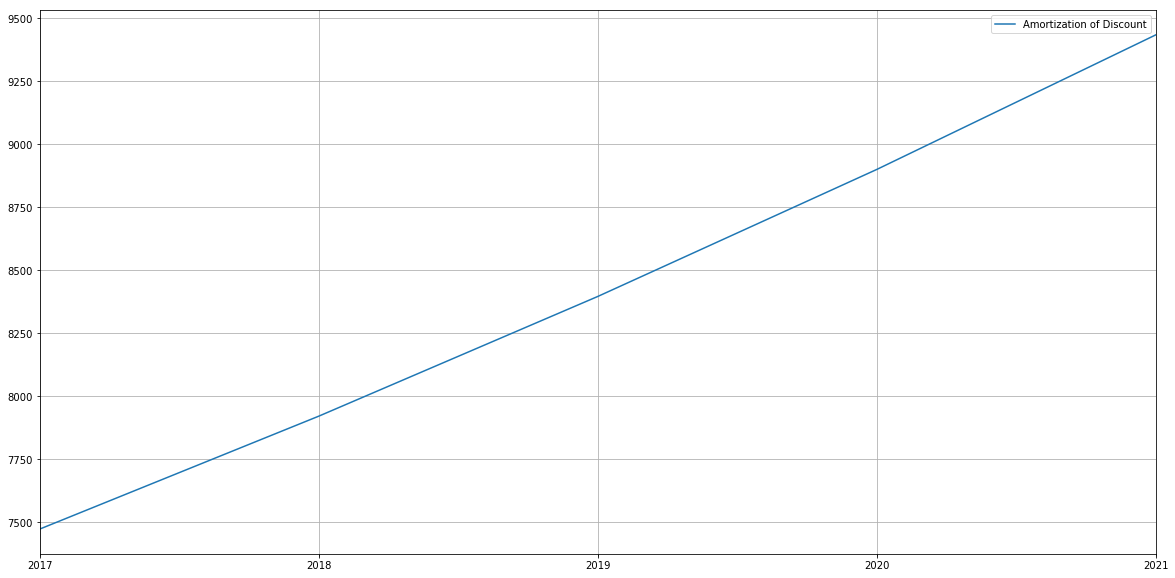

In [11]:
df.plot(x=df.index, y='Amortization of Discount', xticks=df.index, grid=True, figsize=(20, 10))

In [12]:
df.sum()[['Interest Expense', 'Interest Payment']]

Interest Expense    292124.0
Interest Payment    250000.0
dtype: float64